### Vehicles Classification
The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the data file
data = pd.read_csv("vehicle.csv")

In [3]:
# Understanding the datatypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [4]:
# See the dimensions of data,[ no of rows and columns, its ratio, to find if we have sufficient data for analysis
data.shape

(846, 19)

In [5]:
# The column name contains "." as operator, that could mess up when we try to access the value of culumn using dot operator
# there fore replace the . in column names

In [6]:
data.columns = data.columns.str.replace(".","_")

In [7]:
data.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1',
       'skewness_about_2', 'hollows_ratio', 'class'],
      dtype='object')

In [8]:
data.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about_2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [9]:
# Perform Statistical data Analysis
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr_axis_aspect_ratio           2
max_length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr_axis_rectangularity         3
max_length_rectangularity      0
scaled_variance                3
scaled_variance_1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration_1    4
skewness_about                 6
skewness_about_1               1
skewness_about_2               1
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
# Seperate out the dependent variable from independent variables for PCA and further analysis
X = data.loc[:,data.columns != 'class']
Y = data.loc[:,data.columns == 'class']

In [11]:
# Treate the missing values in the dataset
X = X.apply(lambda x: x.fillna(x.median()),axis=0)

In [12]:
X.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr_axis_aspect_ratio           0
max_length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr_axis_rectangularity         0
max_length_rectangularity      0
scaled_variance                0
scaled_variance_1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration_1    0
skewness_about                 0
skewness_about_1               0
skewness_about_2               0
hollows_ratio                  0
dtype: int64

In [13]:
# Perform Statistical analysis
X.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about_2  hollows_ratio  
count        846.000000     846.000000  
mean         188.918440     195.632388  
std            6.152247       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [14]:
#importing necessary libraries for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
# you could convert the dependent variable, [ Target ] which is of the type object to be categorical, and numerical in nature
# by using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
#print(Y)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


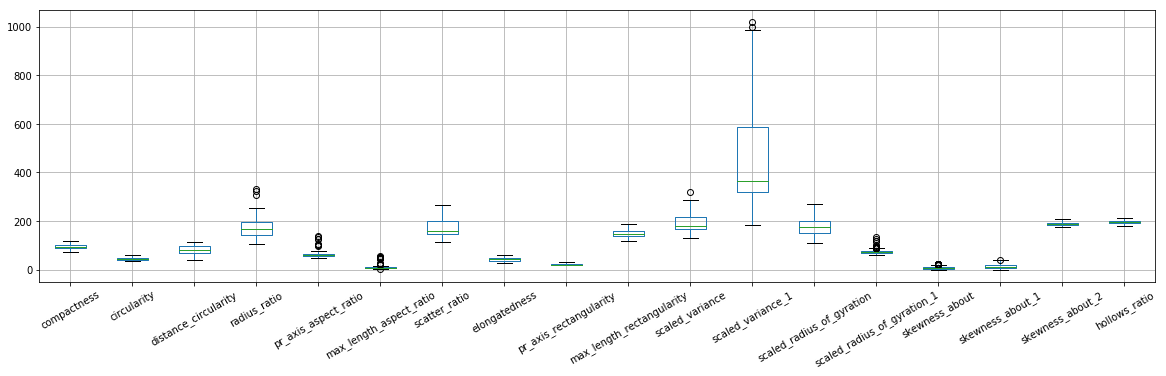

In [16]:
# Check for outliers if any
plt.figure(figsize=(20,5))
ax = X.boxplot()
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

In [17]:
#we could see that there are outliers in the dataset:

In [18]:
# Treat the outliers by replacing the outliers with 5th and 95th percentile values.
# As the dataset has only few rows around 800+, deleting outliers is not suggested. 
Low_Quantile = X.quantile(0.05)
High_Quantile = X.quantile(0.95)
print(Low_Quantile,High_Quantile)

compactness                     82.00
circularity                     36.00
distance_circularity            58.00
radius_ratio                   120.00
pr_axis_aspect_ratio            53.00
max_length_aspect_ratio          5.00
scatter_ratio                  125.25
elongatedness                   30.00
pr_axis_rectangularity          17.25
max_length_rectangularity      126.25
scaled_variance                144.00
scaled_variance_1              229.00
scaled_radius_of_gyration      125.00
scaled_radius_of_gyration_1     63.00
skewness_about                   0.00
skewness_about_1                 1.00
skewness_about_2               179.25
hollows_ratio                  183.00
Name: 0.05, dtype: float64 compactness                    108.00
circularity                     55.00
distance_circularity           107.00
radius_ratio                   222.00
pr_axis_aspect_ratio            71.00
max_length_aspect_ratio         12.00
scatter_ratio                  222.00
elongatedness          

In [19]:
LowOutliers_data = (X< Low_Quantile)
HighOutliers_data = (X > High_Quantile)

In [20]:
X.mask(LowOutliers_data, Low_Quantile, axis=1, inplace = True)  
X.mask(HighOutliers_data,High_Quantile,axis =1, inplace = True)

In [21]:
# find the 5th and 95th quantile for all columns
low = 0.05
high = 0.95
percentiles = X.quantile([low,high])

In [22]:
percentiles

compactness  circularity  distance_circularity  radius_ratio  \
0.05         82.0         36.0                  58.0         120.0   
0.95        108.0         55.0                 107.0         222.0   

      pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
0.05                  53.0                      5.0       125.4375   
0.95                  71.0                     12.0       222.0000   

      elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
0.05           30.0                 17.4375                   126.4375   
0.95           54.0                 25.0000                   173.0000   

      scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
0.05            144.0              229.0                   125.0000   
0.95            234.0              728.0                   228.5625   

      scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0.05                         63.0             0.0               1.0   
0.95                         85.0            16.0              29.0   

      skewness_about_2  hollows_ratio  
0.05          179.4375          183.0  
0.95          200.0000          207.0

In [23]:
X.shape

(846, 18)

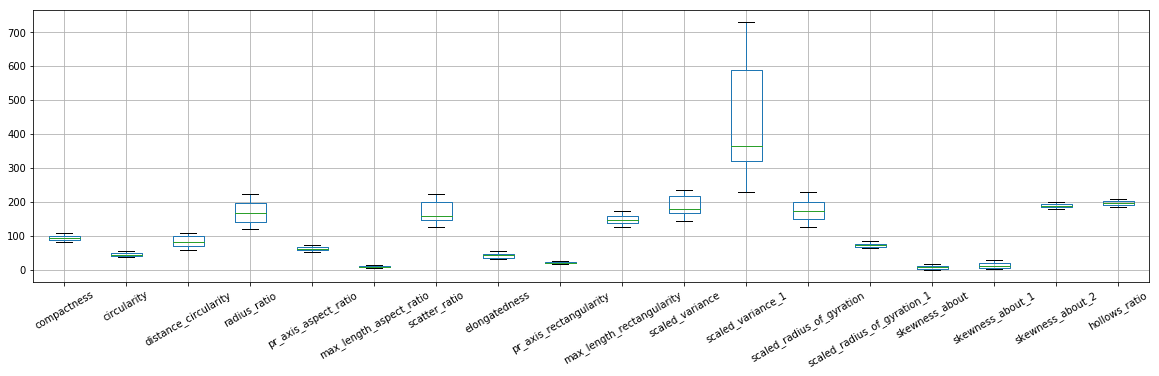

In [24]:
# Recheck if the dataset still contains any outliers
plt.figure(figsize=(20,5))
ax = X.boxplot()
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

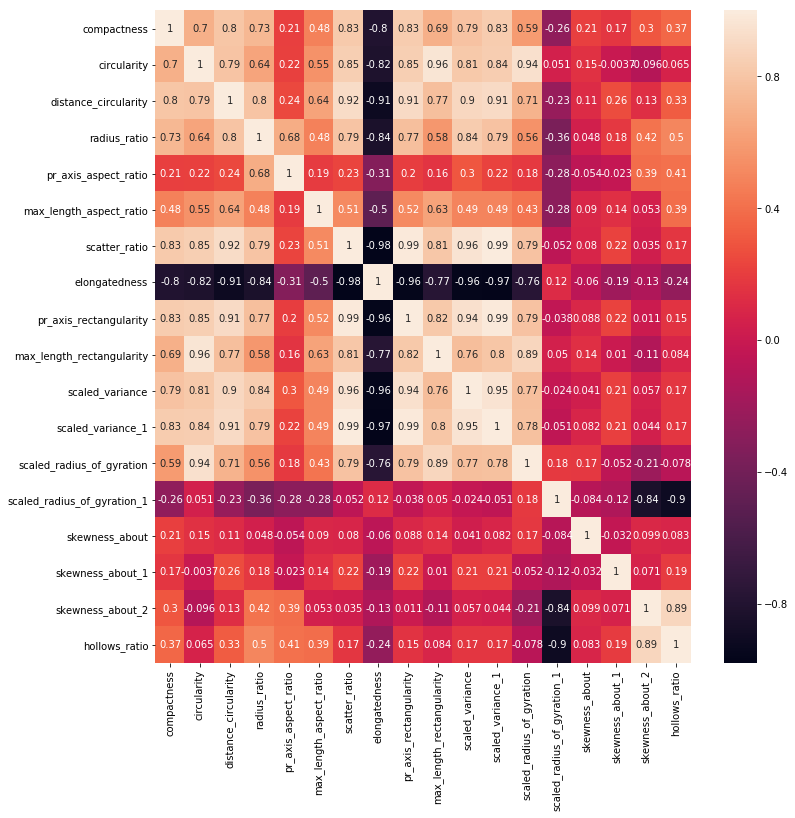

In [25]:
data_corr = X.corr()
plt.figure(figsize=(12,12))
sns.heatmap(data_corr,annot=True)

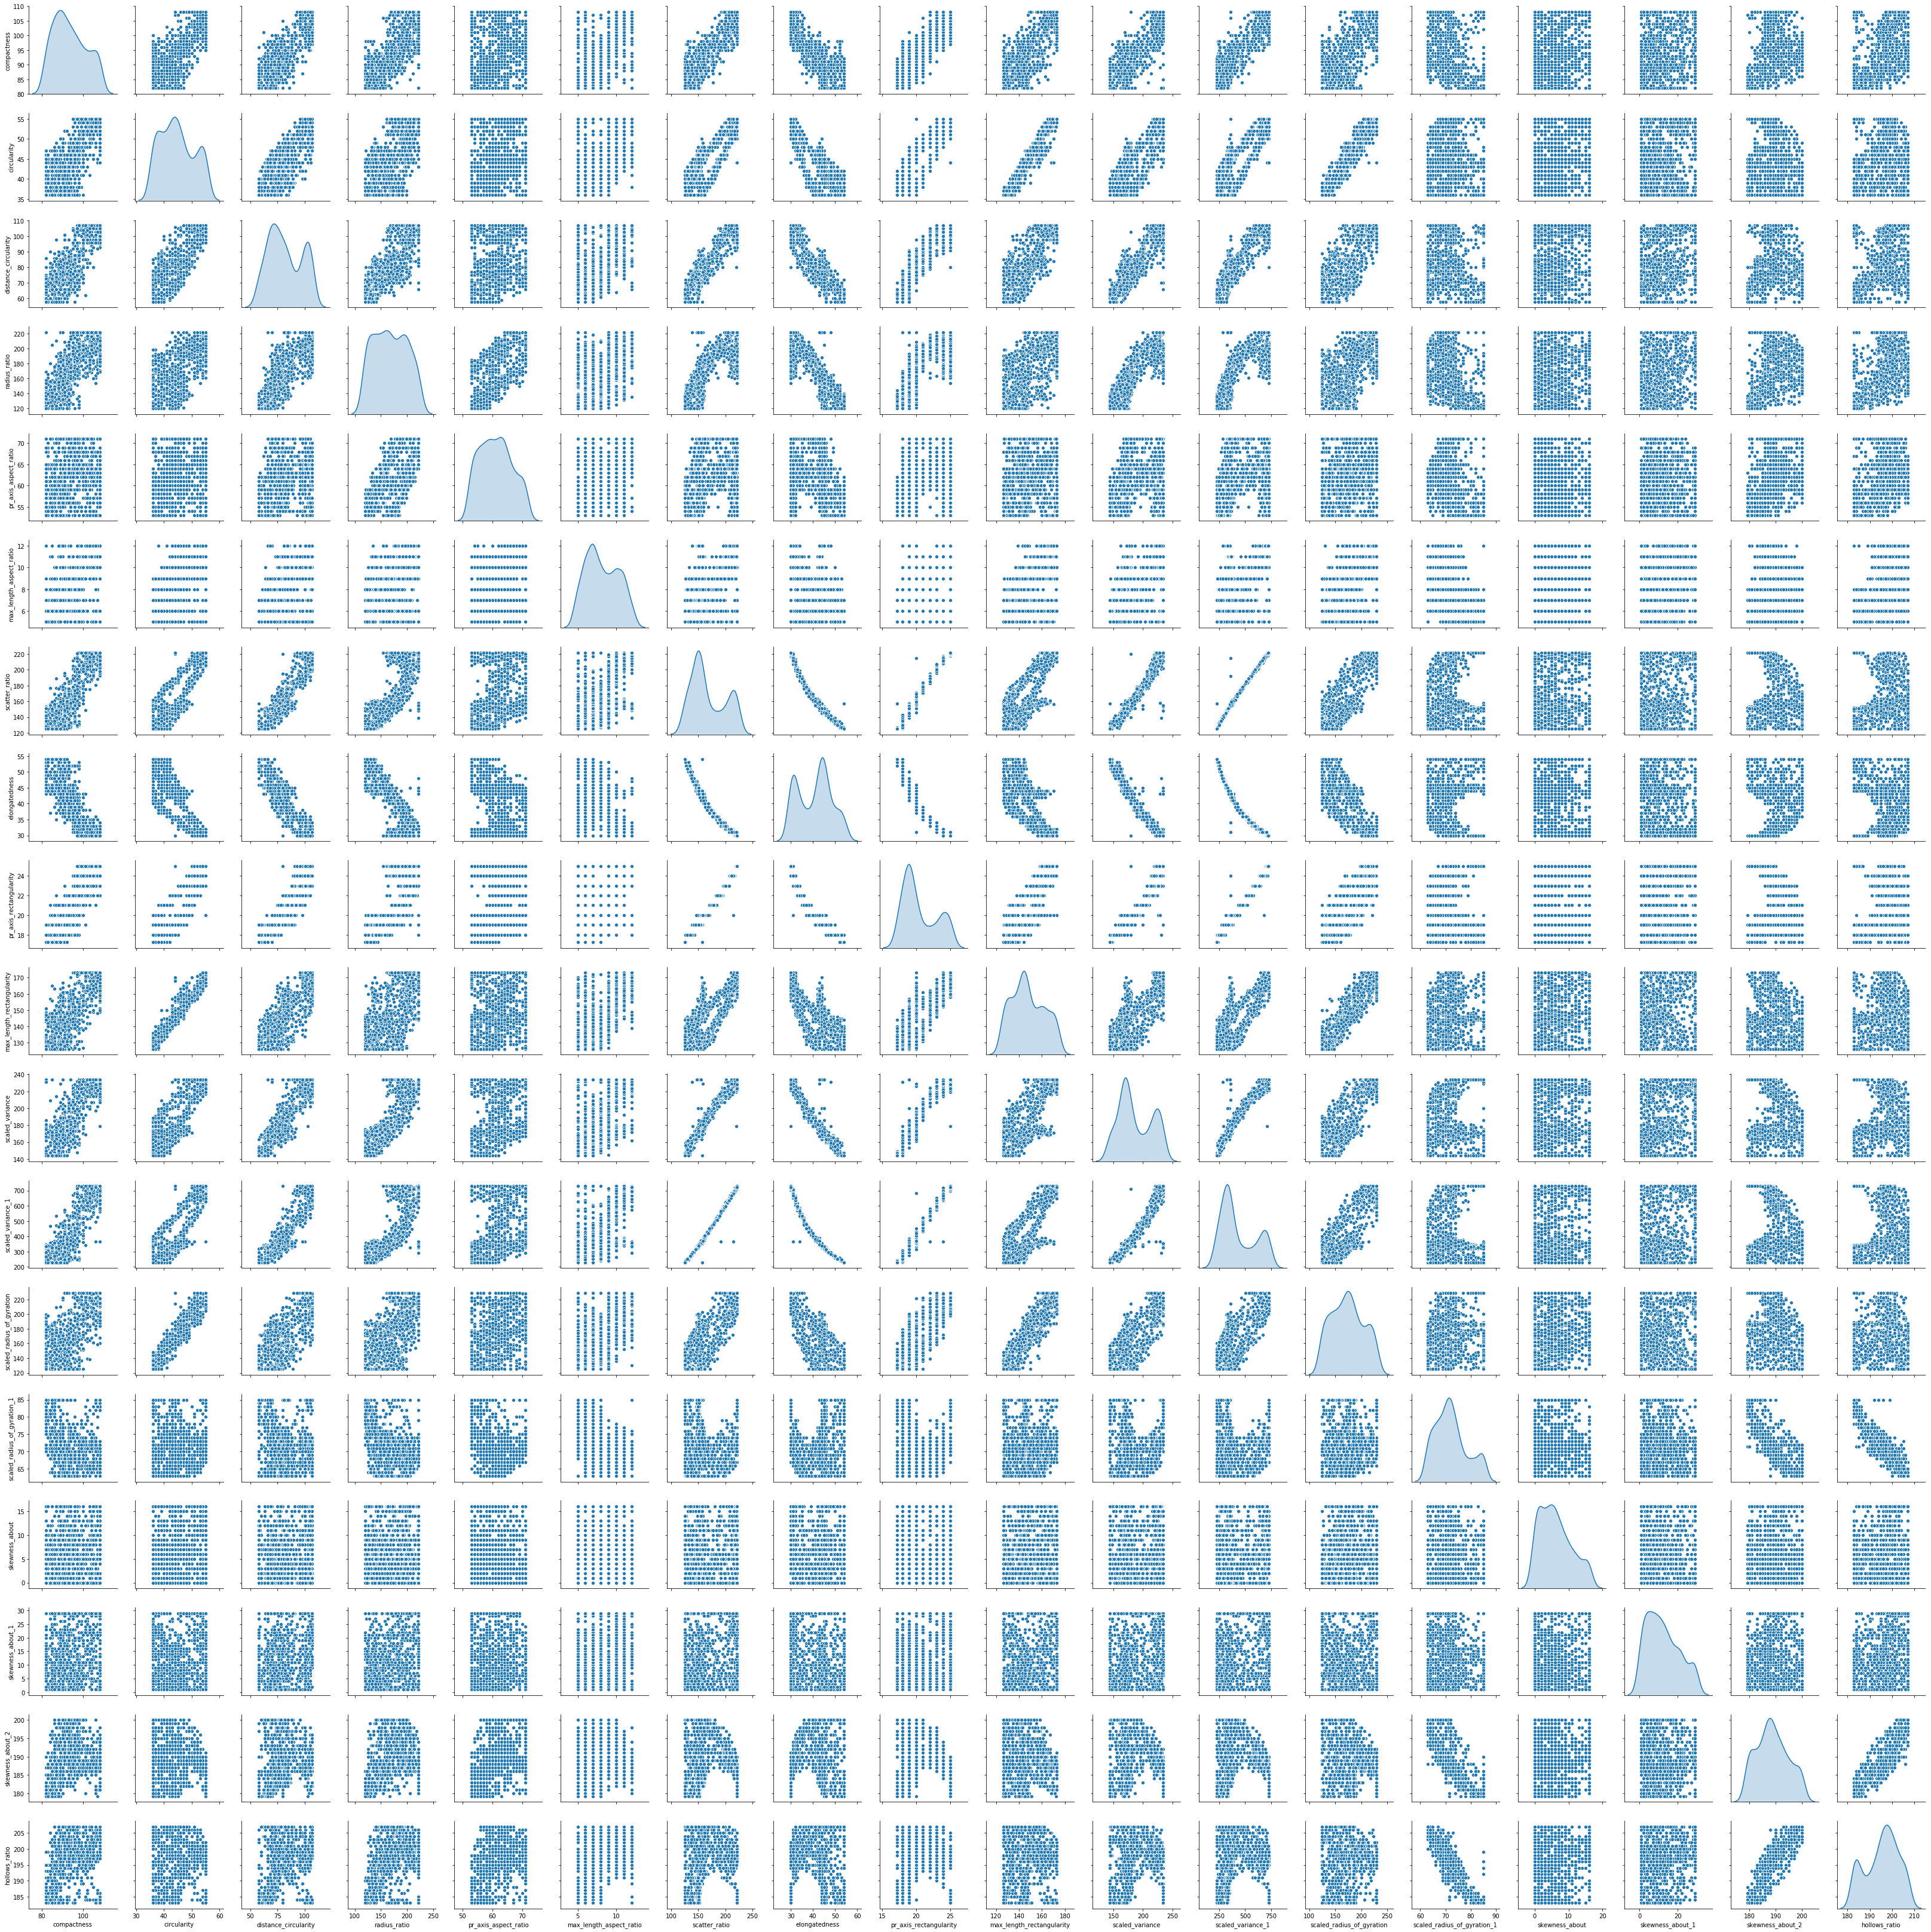

In [26]:
# Inferential Statistics - though Visualizations
# Perform pair plot, to understand every indenedent variable and its relation with dependent variable
sns.pairplot(X, diag_kind='kde') 

In [27]:
# Scale the integer values to remove their weightage, using ZScore or StdScaler
# Calculate the covarience matrix, to understand the weihgtage / relationship b/w variables
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.69800348  0.8045705   0.73537802  0.20558621  0.47664448
   0.8295405  -0.80529918  0.83180643  0.69413563  0.78787922  0.83392292
   0.59229528 -0.26022438  0.21036826  0.16612268  0.29866753  0.37194486]
 [ 0.69800348  1.00118343  0.79385167  0.63872948  0.21612008  0.55280202
   0.85308016 -0.82273968  0.85124274  0.96367783  0.8159437   0.84579061
   0.93994607  0.05090031  0.14645982 -0.00365643 -0.09596399  0.06509103]
 [ 0.8045705   0.79385167  1.00118343  0.79616902  0.24506311  0.63745411
   0.92157974 -0.9136643   0.91340689  0.77479053  0.89665396  0.9119331
   0.71247427 -0.23019488  0.11410268  0.26271913  0.13238811  0.32768419]
 [ 0.73537802  0.63872948  0.79616902  1.00118343  0.6770625   0.48128527
   0.79270294 -0.83779845  0.76913173  0.57928599  0.83743479  0.78782987
   0.55979475 -0.36359568  0.04763242  0.1807214   0.41620788  0.50531508]
 [ 0.20558621  0.21612008  0.24506311  0.6770625   1.00118343  0.18901387
   0.22899903

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [28]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.72955358e-01 -7.63816455e-02 -1.52505809e-01  2.53137346e-02
  -1.37515693e-01  2.37584546e-01 -1.69598533e-01 -7.72008684e-01
   3.02619613e-01  2.22206981e-01 -1.08302259e-01 -1.25350088e-01
  -1.40209645e-02  5.80530184e-02  1.53019822e-01  7.54038342e-03
   1.08172134e-02 -9.59603818e-03]
 [-2.83879657e-01  1.49379539e-01  2.31158799e-02  1.94025606e-01
   1.23034943e-01 -1.77275155e-02  3.99981527e-01 -3.69640902e-02
   4.01134795e-02 -5.59320168e-02  1.29357994e-02  2.66106585e-01
  -2.04345699e-02 -4.07059927e-02  1.19477108e-01  1.31983972e-01
   4.82664373e-01 -5.82806022e-01]
 [-3.00215290e-01 -2.33894731e-02 -9.86133463e-02 -8.51516179e-02
   6.45258762e-02  1.27698922e-02 -1.53028265e-01  2.51706004e-01
   3.04485098e-01  2.83248546e-01  7.60590329e-01 -1.55845660e-01
   5.75736080e-03  6.48127899e-02 -1.25884639e-01 -6.28377303e-03
   3.08044094e-02 -6.67269403e-02]
 [-2.71964870e-01 -1.88032752e-01  2.57757764e-01 -3.59107470e-02
  -1.61456201e-01 -

In [29]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort(reverse = True)
#eig_pairs.reverse()
print(eig_pairs)

[(9.914602881389708, array([-0.27295536, -0.28387966, -0.30021529, -0.27196487, -0.10780616,
       -0.19647795, -0.30880489,  0.3065571 , -0.30606544, -0.27477404,
       -0.30201973, -0.30676603, -0.25952179,  0.05287642, -0.04092421,
       -0.06021215, -0.04483518, -0.09640556])), (3.241375547380465, array([-0.07638165,  0.14937954, -0.02338947, -0.18803275, -0.24281657,
       -0.07229914,  0.06612141, -0.01621586,  0.07770702,  0.14635872,
        0.05485276,  0.06499707,  0.21662467,  0.50394907, -0.02340792,
       -0.0905867 , -0.51402393, -0.5084959 ])), (1.181811018340795, array([ 0.02531373,  0.19402561, -0.08515162, -0.03591075,  0.10822783,
        0.08789443, -0.10392928,  0.08947847, -0.1011892 ,  0.19552713,
       -0.12067048, -0.10070762,  0.22170279, -0.06830908,  0.52842109,
       -0.70650217,  0.08646951,  0.04564661])), (1.1420657061722443, array([-0.15250581,  0.02311588, -0.09861335,  0.25775776,  0.61409027,
       -0.18339492, -0.01418923, -0.05685846, -0.03

In [30]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[9.914602881389708, 3.241375547380465, 1.181811018340795, 1.1420657061722443, 0.8375216827954801, 0.6879266107208286, 0.3479690343093168, 0.22444402081163525, 0.12286459031178248, 0.08495892504735368, 0.0691865936591995, 0.051971402743787164, 0.035476395158012285, 0.026647653464832572, 0.019889944112848723, 0.018648970097804474, 0.011042543775439518, 0.002898254856394024]


In [31]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

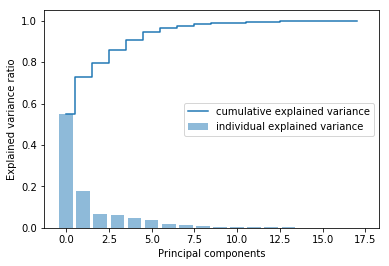

In [32]:
plt.bar(range(0,18), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0,18),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'center right')
plt.show()

In [33]:
cum_var_exp

array([0.55016019, 0.73002376, 0.79560232, 0.85897541, 0.9054494 ,
       0.94362237, 0.96293113, 0.9753855 , 0.98220325, 0.98691761,
       0.99075676, 0.99364065, 0.99560923, 0.99708791, 0.9981916 ,
       0.99922643, 0.99983918, 1.        ])

In [34]:

P_reduce = np.array(eigvectors_sorted[0:6])   # Reducing from 18 to 8 dimension space

X_std_6D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_6D)  # converting array to dataframe for pairplot

In [35]:
Proj_data_df.head()

0         1         2         3         4         5
0 -0.611317 -0.546790  0.410533  0.791343  0.736697 -1.705841
1  1.585217 -0.382014  0.172978 -1.270959  0.498975 -0.178111
2 -4.156361  0.337421  1.210831 -0.233098 -0.876172 -0.699561
3  1.574471 -3.149074  0.442995 -0.301053  0.760412  0.305272
4  0.253703  1.987130  0.507003  1.677056  0.179657 -3.257433

In [36]:
X_std_6D.shape

(846, 6)

In [37]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, Y, test_size=test_size, random_state=seed)

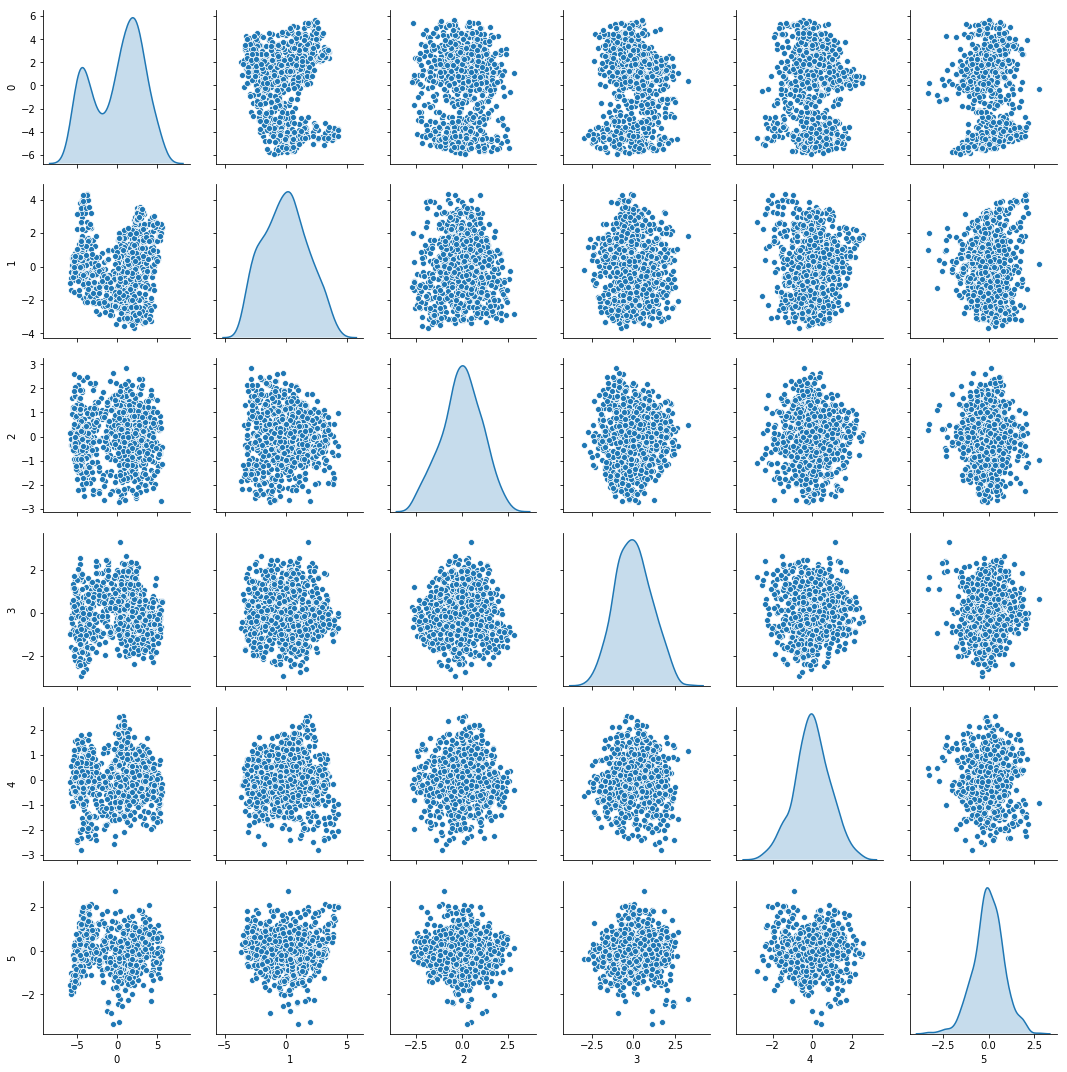

In [38]:
sns.pairplot(Proj_data_df, diag_kind='kde')

In [39]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid = {
    'gamma' : [0.025],
    'C': [0.01,0.05,0.5,1],
    'kernel' : ['linear','rbf'] 
}

svmclf = svm.SVC()
svm_cv= GridSearchCV(estimator=svmclf, param_grid=param_grid)

In [40]:
svm_cv.fit(X_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [0.025], 'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
print(svm_cv.best_params_)

{'C': 1, 'gamma': 0.025, 'kernel': 'rbf'}


In [42]:
svm_cv.score(X_test, y_test)

0.9212598425196851

In [43]:
svm_model = svm.SVC(gamma = 0.025 , C = 1 , kernel = 'rbf')
svm_model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
X_test.shape

(254, 6)

In [45]:
y_test.shape

(254,)

In [46]:
predicted_values = svm_model.predict(X_test)

In [47]:
predicted_values.shape

(254,)

In [48]:
predicted_values[:15]
#pd.crosstab(y_test, predicted_values, rownames=['Actuals'], colnames=['Predicted'])

array([2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2])

In [49]:
pd.crosstab(y_test, predicted_values,rownames=['Actuals'], colnames=['Predicted'])

Predicted   0    1   2
Actuals               
0          61    2   3
1           3  115   9
2           2    1  58

In [50]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x]== predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [51]:
getAccuracy(y_test , predicted_values)   # Calling getAccuracy function instead of usinig array comparison to get the %age accuracy

92.1259842519685

#### Trying to check with the few independent variables 

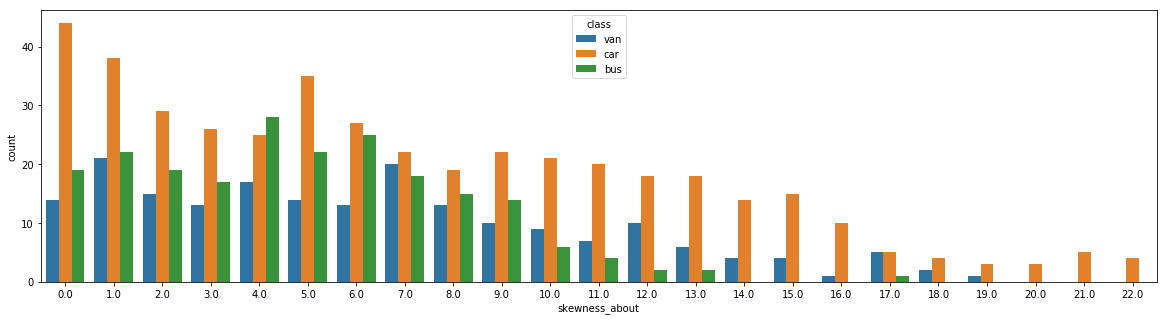

In [52]:
plt.figure(figsize=(20,5))
sns.countplot(data['skewness_about'],hue= data['class'])

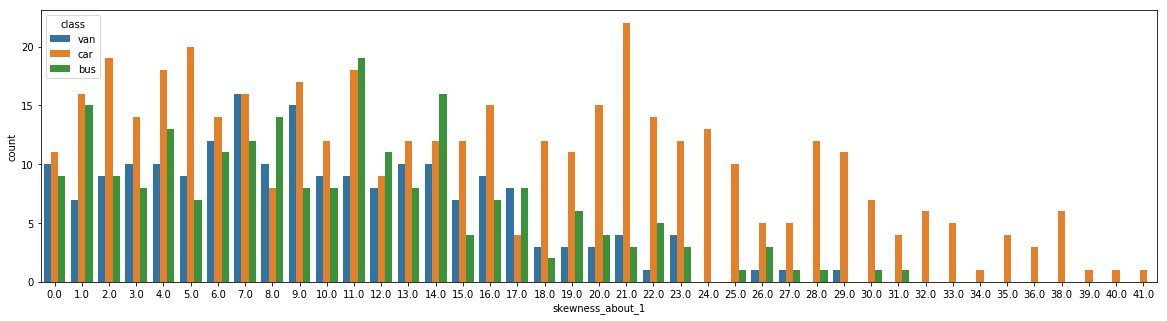

In [53]:
plt.figure(figsize=(20,5))
sns.countplot(data['skewness_about_1'],hue=data['class'])

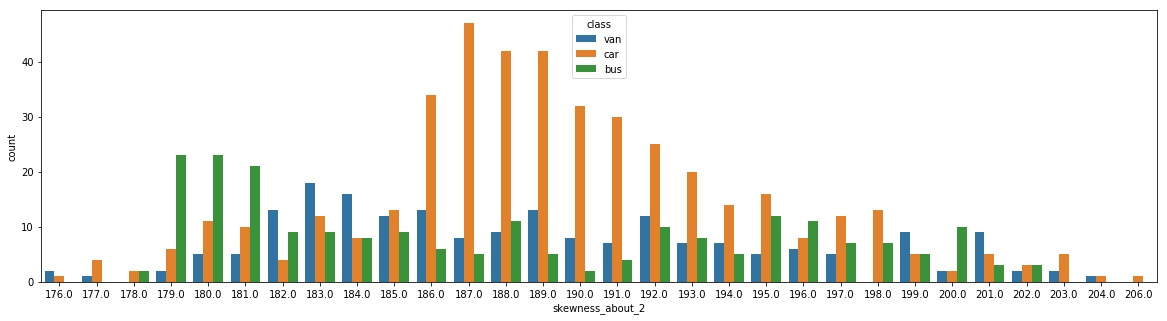

In [54]:
plt.figure(figsize=(20,5))
sns.countplot(data['skewness_about_2'],hue=data['class'])

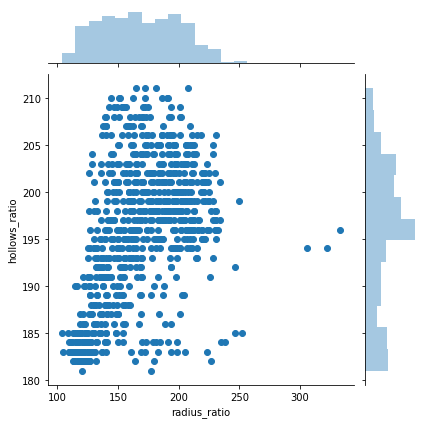

In [55]:
sns.jointplot(data['radius_ratio'],data['hollows_ratio'])

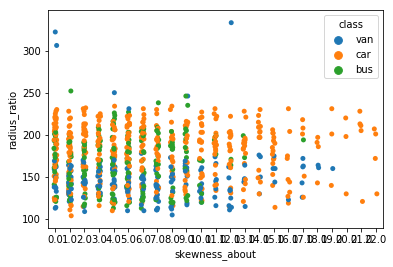

In [56]:
sns.stripplot(data['skewness_about'],data['radius_ratio'],hue=data['class'])

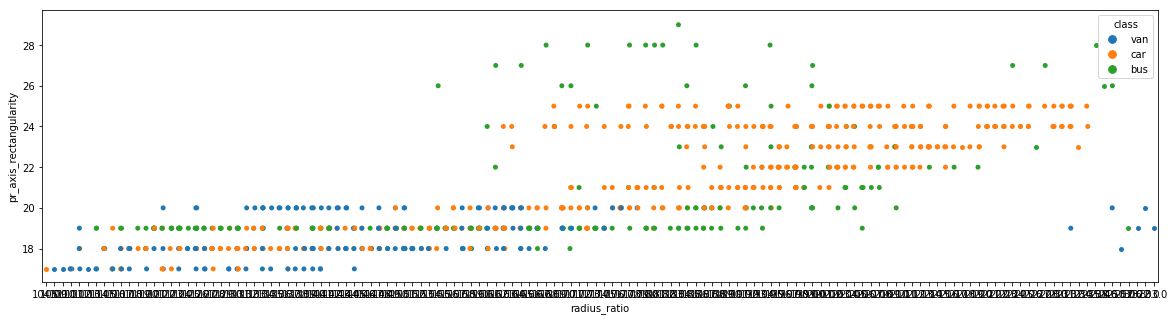

In [57]:
plt.figure(figsize=(20,5))
sns.stripplot(data['radius_ratio'],data['pr_axis_rectangularity'],hue=data['class'])

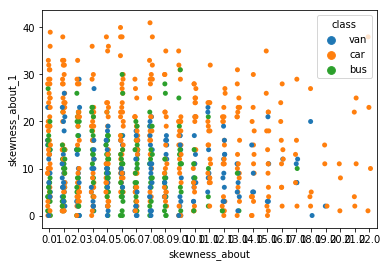

In [58]:
sns.stripplot(data['skewness_about'],data['skewness_about_1'],hue=data['class'])

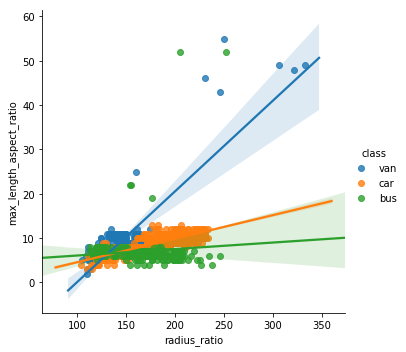

In [59]:
sns.lmplot(x='radius_ratio',y='max_length_aspect_ratio',data= data,hue= 'class')

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([165., 430., 148.,  90.,   3.,   2.,   0.,   2.,   1.,   1.]),
 array([ 59. ,  66.6,  74.2,  81.8,  89.4,  97. , 104.6, 112.2, 119.8,
        127.4, 135. ]),
 <a list of 10 Patch objects>)

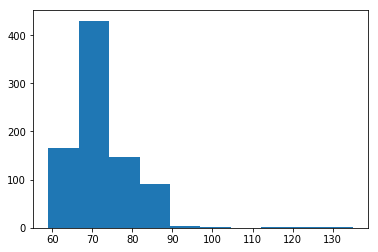

In [60]:
plt.hist(data['scaled_radius_of_gyration_1'])

(array([ 42., 104., 115., 146., 176.,  96.,  95.,  39.,  21.,  10.]),
 array([109. , 124.9, 140.8, 156.7, 172.6, 188.5, 204.4, 220.3, 236.2,
        252.1, 268. ]),
 <a list of 10 Patch objects>)

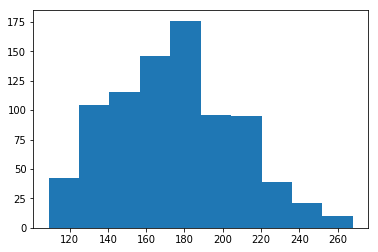

In [61]:
plt.hist(data['scaled_radius_of_gyration'])

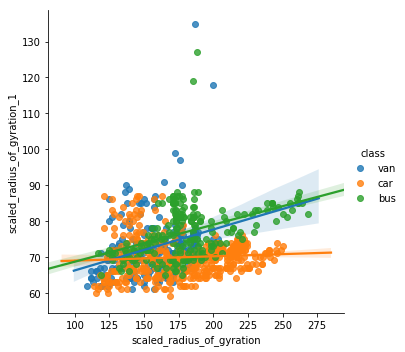

In [62]:
sns.lmplot(x='scaled_radius_of_gyration',y='scaled_radius_of_gyration_1',data=data, hue='class')

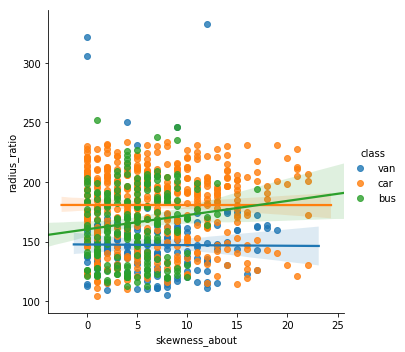

In [63]:
sns.lmplot(x='skewness_about',y='radius_ratio',data=data, hue='class')

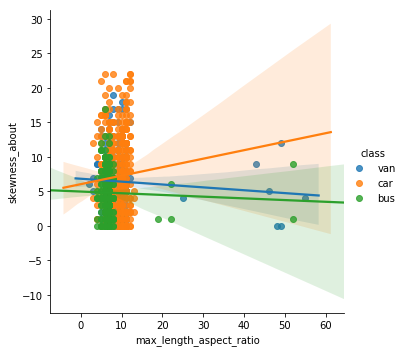

In [64]:
sns.lmplot(x='max_length_aspect_ratio',y='skewness_about',data=data, hue='class')

In [65]:
# Analysing the pair plot, there are few attributes that shows no prominent relationship between variables like 
#:pr_axis_rectangularity,skewness_about,skewness_about_1,skewness_about_2,
# hollows_ratio,scaled_radius_of_gyration_1,Max_length_aspect_ratio are analysed.
# We understand that the below variables doesnot play not much role in predicting class variable / improving accuracy
# Hence we can try removing there variables and perform analysis.
# 'pr_axis_rectangularity','pr_axis_aspect_ratio','scaled_radius_of_gyration_1','skewness_about','skewness_about_1','skewness_about_2'

In [66]:
new_df = X.copy(deep = True)

In [67]:
new_df['class'] = data['class']

In [68]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr_axis_aspect_ratio           846 non-null float64
max_length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr_axis_rectangularity         846 non-null float64
max_length_rectangularity      846 non-null float64
scaled_variance                846 non-null float64
scaled_variance_1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration_1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about_1               846 non-null float64
skewness_about_2               846 non-null float64
hollows_ratio  

In [69]:
new_df.drop(['pr_axis_rectangularity','pr_axis_aspect_ratio','scaled_radius_of_gyration_1','skewness_about','skewness_about_1','skewness_about_2'],axis=1,inplace = True)

In [70]:
new_x = new_df.loc[:,new_df.columns != 'class']
new_y = new_df['class'] 
new_y = le.fit_transform(new_y)

In [71]:
new_x=sc.fit_transform(new_x)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [72]:
print(new_x.shape,new_y.shape)

(846, 12) (846,)


In [73]:
new_x_std = new_x          
cov_matrix_new = np.cov(new_x_std.T)

In [74]:
eig_val,eig_vec = np.linalg.eig(cov_matrix_new)

In [75]:
eig_pairs_new = [(eig_val[index], eig_vec[:,index]) for index in range(len(eig_val))]
eig_pairs_new.sort(reverse = True)

In [76]:
eigvalues_sorted_new = [eig_pairs_new[index][0] for index in range(len(eig_val))]
eigvectors_sorted_new = [eig_pairs_new[index][1] for index in range(len(eig_val))]


In [77]:
# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted_new)

total = sum(eig_val)
var_explained_new = [(i / total) for i in sorted(eig_val, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp_new = np.cumsum(var_explained_new)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%


Eigenvalues in descending order: 
[8.796102503088441, 1.3992810933944333, 0.7888140241904847, 0.3564573306297823, 0.28931174990236963, 0.1478218205099795, 0.08476035817885932, 0.06741257687251402, 0.03629220059817979, 0.02420631668191413, 0.020251273427386043, 0.003489935957622042]


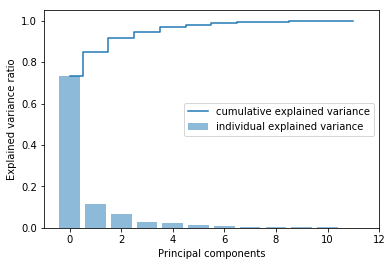

In [78]:
plt.bar(range(0,12), var_explained_new, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0,12),cum_var_exp_new, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'center right')
plt.show()


In [79]:
cum_var_exp

array([0.55016019, 0.73002376, 0.79560232, 0.85897541, 0.9054494 ,
       0.94362237, 0.96293113, 0.9753855 , 0.98220325, 0.98691761,
       0.99075676, 0.99364065, 0.99560923, 0.99708791, 0.9981916 ,
       0.99922643, 0.99983918, 1.        ])

In [80]:
Reduced_attr = np.array(eigvectors_sorted_new[0:4])   # Reducing from 12 to 4 dimension space
X_std_4D = np.dot(new_x_std,Reduced_attr.T)   # projecting original data into principal component dimensions
Proj_data_df_new = pd.DataFrame(X_std_4D)


In [81]:
X_train_new, X_test_new, y_train_new, y_test_new = model_selection.train_test_split(Proj_data_df_new,new_y,test_size=test_size, random_state=seed)

In [82]:
svm_cv.fit(X_train_new, y_train_new)
print(svm_cv.best_params_)
svm_cv.score(X_test_new, y_test_new)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 1, 'gamma': 0.025, 'kernel': 'rbf'}


0.8740157480314961

In [87]:
svm_model_new = svm.SVC(gamma = 0.025 , C = 1 , kernel = 'rbf')
svm_model_new.fit(X_train_new, y_train_new)
predicted_values_new = svm_model_new.predict(X_test_new)

In [88]:
pd.crosstab(y_test_new, predicted_values_new,rownames=['Actuals'], colnames=['Predicted'])

Predicted   0    1   2
Actuals               
0          60    3   3
1          14  107   6
2           1    5  55

### Comparing the two models, we conclude that the model 1, including all the attributes gives the better accuracy and cv score, in predicting the independent variable, specially class1 [ 115 were class2, and were predicted as class2]
### Though the model2, gives less accuracy score, compared to model1., when we look at the crossvalidation scores, the algorithm is as well doing a pretty good job in predicting class1 [ 107 were predicted as class2, 8  values more compared with model1, were predicted as class0]
### Comparitively, one can consider going ahead with all the attributes.